In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import model_selection
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import time


In [2]:
data=pd.read_csv("LoanRiskScore.csv")
data['LoanRiskScore'].fillna( data['LoanRiskScore'].median() , inplace=True)

X=data.drop(['LoanRiskScore'],axis=1)
Y=data['LoanRiskScore']

In [5]:
data.head()

,ListingNumber,CreditGrade,Term,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory,BorrowerState,EmploymentStatus,EmploymentStatusDuration,...,BankcardUtilization,AvailableBankcardCredit,TotalTrades,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,TotalProsperPaymentsBilled,LoanNumber,LoanOriginalAmount,LoanRiskScore
0,193129,C,36,Completed,0.16516,0.1580,0,CO,Self-employed,2.0,...,0.00,1500.0,11.0,0.17,"$25,000-49,999",3083.333333,NaN,19141,9425,6.504759
1,1209647,NaN,36,Current,0.12016,0.0920,2,CO,Employed,44.0,...,0.21,10266.0,29.0,0.18,"$50,000-74,999",6125.000000,NaN,134815,10000,7.761652
2,81716,HR,36,Completed,0.28269,0.2750,0,GA,Not available,NaN,...,NaN,NaN,NaN,0.06,Not displayed,2083.333333,NaN,6466,3001,6.504759
3,658116,NaN,36,Current,0.12528,0.0974,16,GA,Employed,113.0,...,0.04,30754.0,26.0,0.15,"$25,000-49,999",2875.000000,NaN,77296,10000,9.731209
4,909464,NaN,36,Current,0.24614,0.2085,2,MN,Employed,44.0,...,0.81,695.0,39.0,0.26,"$100,000+",9583.333333,11.0,102670,15000,4.539453


Text(0, 0.5, 'LoanRiskScore')

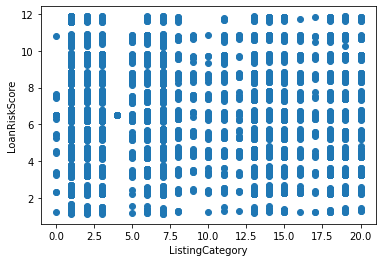

In [34]:
plt.scatter(x=data['ListingCategory'], y=data['LoanRiskScore'])
plt.xlabel("ListingCategory")
plt.ylabel('LoanRiskScore')

Text(0, 0.5, 'LoanRiskScore')

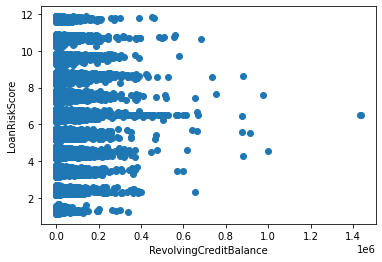

In [35]:
plt.scatter(x=data['RevolvingCreditBalance'], y=data['LoanRiskScore'])
plt.xlabel("RevolvingCreditBalance")
plt.ylabel('LoanRiskScore')

Text(0, 0.5, 'LoanRiskScore')

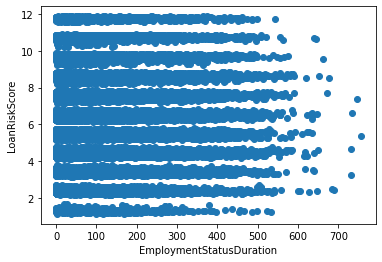

In [36]:
plt.scatter(x=data['EmploymentStatusDuration'], y=data['LoanRiskScore'])
plt.xlabel("EmploymentStatusDuration")
plt.ylabel('LoanRiskScore')

In [37]:
data.info();


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107937 entries, 0 to 107936
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ListingNumber               107937 non-null  int64  
 1   CreditGrade                 27422 non-null   object 
 2   Term                        107937 non-null  int64  
 3   LoanStatus                  107937 non-null  object 
 4   BorrowerAPR                 107915 non-null  float64
 5   BorrowerRate                107937 non-null  float64
 6   ListingCategory             107937 non-null  int64  
 7   BorrowerState               102715 non-null  object 
 8   EmploymentStatus            105806 non-null  object 
 9   EmploymentStatusDuration    100696 non-null  float64
 10  IsBorrowerHomeowner         107937 non-null  bool   
 11  CreditScoreRangeLower       107373 non-null  float64
 12  CreditScoreRangeUpper       107373 non-null  float64
 13  RevolvingCredi

In [38]:
data.corr()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,ListingCategory,EmploymentStatusDuration,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperPaymentsBilled,LoanNumber,LoanOriginalAmount,LoanRiskScore
ListingNumber,1.000000,0.320097,-0.031345,-0.114307,0.127252,0.155236,0.076281,0.269168,0.269168,0.056973,0.086506,0.036669,0.135032,-0.041207,0.075273,0.132593,0.995100,0.339694,-0.055039
Term,0.320097,1.000000,-0.010764,0.020325,0.003975,0.081514,0.085400,0.126349,0.126349,0.025497,0.031825,0.015175,0.079243,-0.014538,0.027875,0.000275,0.335745,0.338805,0.027063
BorrowerAPR,-0.031345,-0.010764,1.000000,0.989856,0.133657,-0.007798,-0.132070,-0.429779,-0.429779,-0.057917,0.261244,-0.347827,-0.041832,0.056658,-0.081216,0.034176,-0.036124,-0.323022,-0.603345
BorrowerRate,-0.114307,0.020325,0.989856,1.000000,0.104040,-0.019139,-0.133654,-0.461593,-0.461593,-0.059011,0.255189,-0.342838,-0.048196,0.063231,-0.087742,0.021599,-0.118653,-0.329179,-0.589432
ListingCategory,0.127252,0.003975,0.133657,0.104040,1.000000,-0.004512,-0.038573,0.101984,0.101984,-0.050284,-0.086924,-0.031458,-0.066344,-0.042994,0.001037,-0.003024,0.123959,-0.127725,-0.016463
EmploymentStatusDuration,0.155236,0.081514,-0.007798,-0.019139,-0.004512,1.000000,0.171524,0.080055,0.080055,0.118506,0.082242,0.050768,0.217411,-0.011999,0.068847,0.069250,0.158277,0.097208,-0.005299
IsBorrowerHomeowner,0.076281,0.085400,-0.132070,-0.133654,-0.038573,0.171524,1.000000,0.293326,0.293326,0.224671,0.085833,0.141548,0.317456,0.000510,0.139912,0.002550,0.075525,0.206650,0.059707
CreditScoreRangeLower,0.269168,0.126349,-0.429779,-0.461593,0.101984,0.080055,0.293326,1.000000,1.000000,0.087675,-0.405479,0.452567,0.138875,-0.013508,0.106929,-0.026369,0.264439,0.341175,0.234984
CreditScoreRangeUpper,0.269168,0.126349,-0.429779,-0.461593,0.101984,0.080055,0.293326,1.000000,1.000000,0.087675,-0.405479,0.452567,0.138875,-0.013508,0.106929,-0.026369,0.264439,0.341175,0.234984
RevolvingCreditBalance,0.056973,0.025497,-0.057917,-0.059011,-0.050284,0.118506,0.224671,0.087675,0.087675,1.000000,0.246774,0.239700,0.283885,0.038433,0.194814,-0.000724,0.056690,0.190277,0.037971


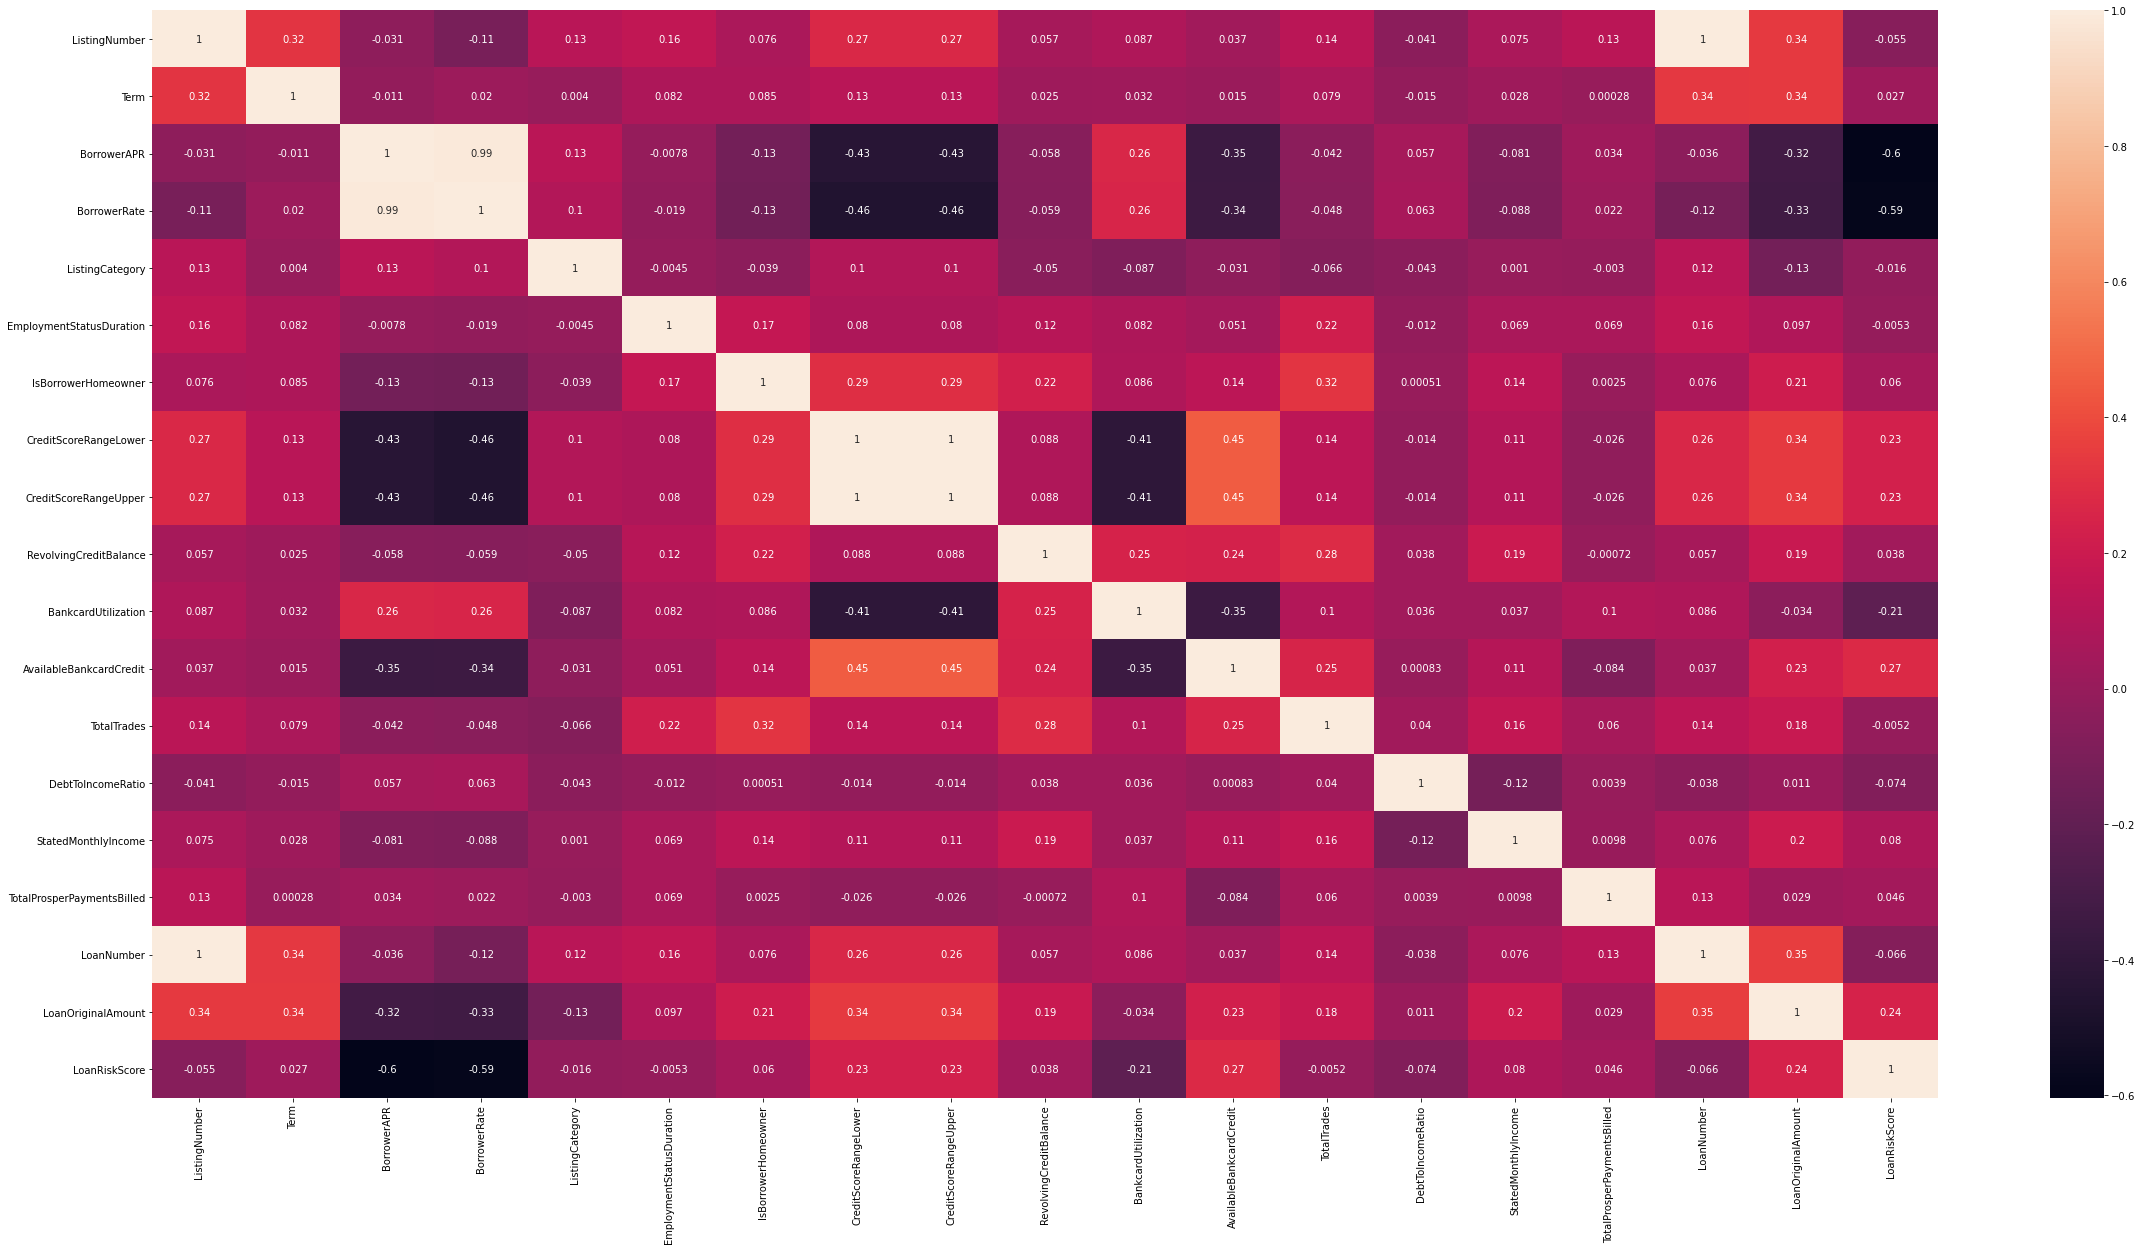

In [4]:
corrMatrix = data.corr()
sn.heatmap(corrMatrix, annot=True)
plt.rcParams["figure.figsize"] = (50,20)
plt.show()

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=42)
X_train=X_train.drop(['CreditGrade','ListingNumber','LoanNumber','TotalProsperPaymentsBilled'],axis=1)
X_train=X_train.drop(['EmploymentStatusDuration','TotalTrades','ListingCategory','BorrowerState','RevolvingCreditBalance'],axis=1)
X_test=X_test.drop(['CreditGrade','ListingNumber','LoanNumber','TotalProsperPaymentsBilled'],axis=1)
X_test=X_test.drop(['EmploymentStatusDuration','TotalTrades','ListingCategory','BorrowerState','RevolvingCreditBalance'],axis=1)

In [61]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107937 entries, 0 to 107936
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Term                     107937 non-null  int64  
 1   LoanStatus               107937 non-null  object 
 2   BorrowerAPR              107915 non-null  float64
 3   BorrowerRate             107937 non-null  float64
 4   EmploymentStatus         105806 non-null  object 
 5   IsBorrowerHomeowner      107937 non-null  bool   
 6   CreditScoreRangeLower    107373 non-null  float64
 7   CreditScoreRangeUpper    107373 non-null  float64
 8   BankcardUtilization      100717 non-null  float64
 9   AvailableBankcardCredit  100775 non-null  float64
 10  DebtToIncomeRatio        99841 non-null   float64
 11  IncomeRange              107937 non-null  object 
 12  StatedMonthlyIncome      107937 non-null  float64
 13  LoanOriginalAmount       107937 non-null  int64  
dtypes: b

In [31]:
X_train['BorrowerAPR'].fillna( X_train['BorrowerAPR'].median() , inplace=True)
X_train['BankcardUtilization'].fillna( X_train['BankcardUtilization'].median() , inplace=True)
X_train['AvailableBankcardCredit'].fillna( X_train['AvailableBankcardCredit'].median() , inplace=True)
X_train['DebtToIncomeRatio'].fillna( X_train['DebtToIncomeRatio'].median() , inplace=True)

X_test['BorrowerAPR'].fillna( X_test['BorrowerAPR'].median() , inplace=True)
X_test['BankcardUtilization'].fillna( X_test['BankcardUtilization'].median() , inplace=True)
X_test['AvailableBankcardCredit'].fillna( X_test['AvailableBankcardCredit'].median() , inplace=True)
X_test['DebtToIncomeRatio'].fillna( X_test['DebtToIncomeRatio'].median() , inplace=True)

In [32]:
X_train["IncomeRange"].replace({"Not displayed": "$25,000-49,999"}, inplace=True)
X_train = X_train.apply(lambda x: x.fillna(x.value_counts().index[0]))
X_train["IsBorrowerHomeowner"]= np.where(X_train["IsBorrowerHomeowner"]=="FALSE",0,1)

X_test["IncomeRange"].replace({"Not displayed": "$25,000-49,999"}, inplace=True)
X_test = X_test.apply(lambda x: x.fillna(x.value_counts().index[0]))
X_test["IsBorrowerHomeowner"]= np.where(X_test["IsBorrowerHomeowner"]=="FALSE",0,1)

In [33]:
temp=pd.get_dummies(X_train.EmploymentStatus, prefix='EmploymentStatus')
X_train=X_train.drop(['EmploymentStatus'],axis=1)
X_train=X_train.join(temp)
temp=pd.get_dummies(X_train.LoanStatus, prefix='LoanStatus')
X_train=X_train.drop(['LoanStatus'],axis=1)
X_train=X_train.join(temp)
temp=pd.get_dummies(X_train.IncomeRange, prefix='IncomeRange')
X_train=X_train.drop(['IncomeRange'],axis=1)
X_train=X_train.join(temp)

temp=pd.get_dummies(X_test.EmploymentStatus, prefix='EmploymentStatus')
X_test=X_test.drop(['EmploymentStatus'],axis=1)
X_test=X_test.join(temp)
temp=pd.get_dummies(X_test.LoanStatus, prefix='LoanStatus')
X_test=X_test.drop(['LoanStatus'],axis=1)
X_test=X_test.join(temp)
temp=pd.get_dummies(X_test.IncomeRange, prefix='IncomeRange')
X_test=X_test.drop(['IncomeRange'],axis=1)
X_test=X_test.join(temp)